In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulating discrete time, discrete state Markov processes

Simulating discrete time, discrete state Markov processes is easy.  We can use the following algorithm (which is really just the composition method):

1) Generate $X_{t_1}$ from the initial distribution.

2) If you just generated the value $X_{t_k} = x_i$, then generate $X_{t_{k+1}}$ from the conditional distribution $\mathbb{P}\left[X_{t_{k+1}} = x_j \:\vert\: X_{t_k} = x_i\right]$.  In other words, sample $X_{t_{k + 1}}$ from a distribution whose pmf is the $i$th row of $P(t_k)$.

3) Repeat step (2).

### Example: Random Walk

Let $\{X_k\}$ be a discrete time, integer valued stochastic process where $X_0 = 0$ with probability 1 and

$$\mathbb{P}\left[X_{k + 1} = j \:\vert\: X_{k} = i\right] = \left\{ \begin{array}{cc} p & j = i + 1 \\ 1 - p & j = i - 1 \\ 0 & \textrm{otherwise} \end{array} \right.$$

This is a time-homogeneous Markov process.  It is called a *random walk*.  If $p = 1/2$, then it is a *symmetric random walk*.  We can simulate this walk with the following code:

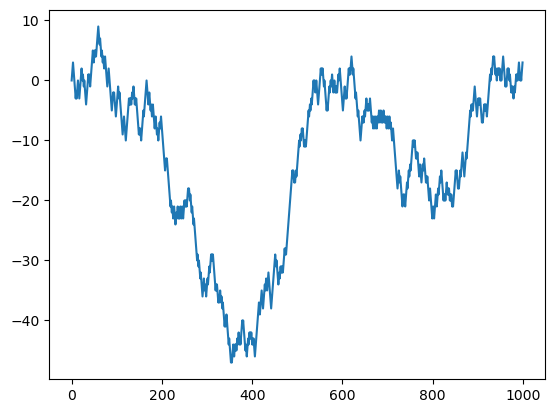

In [2]:
p = 0.5

n = 1000
x = np.zeros(n)
t = np.arange(n)
for k in range(n - 1):
    u = np.random.uniform(0, 1)
    if u <= p:
        x[k + 1] = x[k] + 1
    else:
        x[k + 1] = x[k] - 1

plt.plot(t, x)
plt.show()

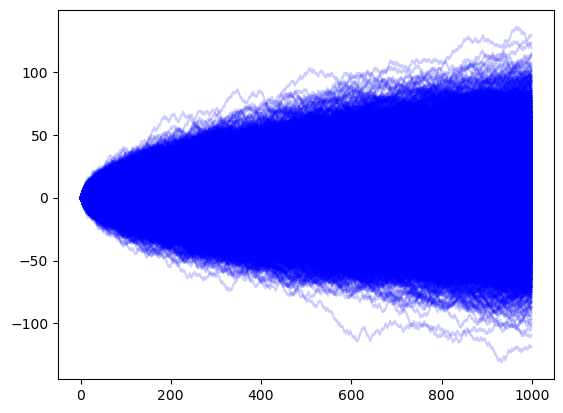

In [3]:
p = 0.503

n = 1000 # number of time steps
m = 10000 # number of trajectories
x = np.zeros((m, n))
t = np.arange(n)
for i in range(m):
    for j in range(n - 1):
        u = np.random.uniform(0, 1)
        if u <= p:
            x[i, j + 1] = x[i, j] + 1
        else:
            x[i, j + 1] = x[i, j] - 1

for i in range(m):
    plt.plot(t, x[i, :], 'b', alpha=0.2)
plt.show()

In [4]:
max_vals = np.zeros(m)
min_vals = np.zeros(m)
terminal_vals = np.zeros(m)
for i in range(m):
    max_vals[i] = np.max(x[i, :])
    min_vals[i] = np.min(x[i, :])
    terminal_vals[i] = x[i, -1]
print("Expected maximum value = {}".format(np.mean(max_vals)))
print("Expected minimum value = {}".format(np.mean(min_vals)))
print("Expected terminal value = {}".format(np.mean(terminal_vals)))

Expected maximum value = 27.9092
Expected minimum value = -21.6951
Expected terminal value = 6.0884


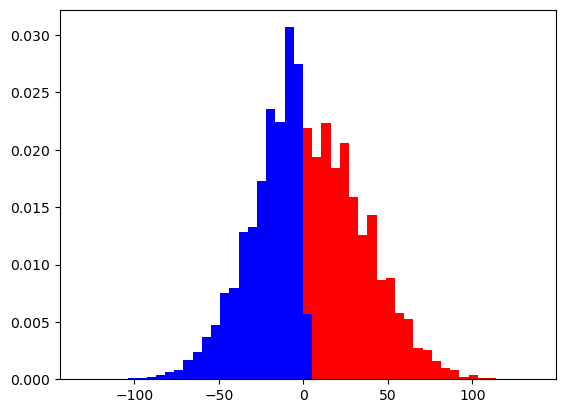

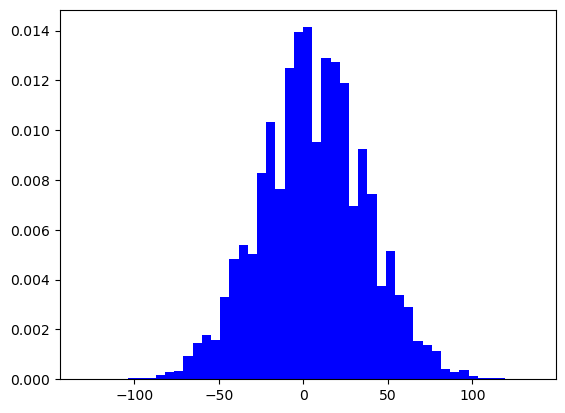

In [5]:
bins = np.linspace(np.min(x), np.max(x), 50)
plt.hist(max_vals, bins=bins, density=True, color='r')
plt.hist(min_vals, bins=bins, density=True, color='b')
plt.show()
plt.hist(terminal_vals, bins=bins, density=True, color='b')
plt.show()

### Example: Brownian Motion

The process $\{X_t\:\vert\: t\in [0, \infty)\}$ is a *Brownian motion* with parameters $\mu$ and $\sigma$ if it is a Markov process and for every $0 \leq t_1 < t_2 < \infty$, the increment $X_{t_2} - X_{t_1}$ is normally distributed with mean $\mu\Delta t$ and variance $\sigma^2\Delta t$, where $\Delta t = t_2 - t_1$.  That is,

$$X_{t_2} - X_{t_1} \sim N(\mu\Delta t, \sigma^2\Delta t)$$

We denote such a process by

$$X\sim BM(\mu, \sigma)$$

The paramter $\mu$ is called the *drift* and the parameter $\sigma$ is called the *volatility*.

If $B\sim BM(\mu, \sigma)$ and $B_0 = 0$, then we call $B$ a *standard Brownian motion*.  It is useful to note that if $X\sim BM(\mu, \sigma)$ and $X_0 = x_0$, then

$$X_t = x_0 + \mu t + \sigma B_t$$

The following code simulates $X\sim BM(\mu, \sigma)$ at a sequence of evenly spaced times:

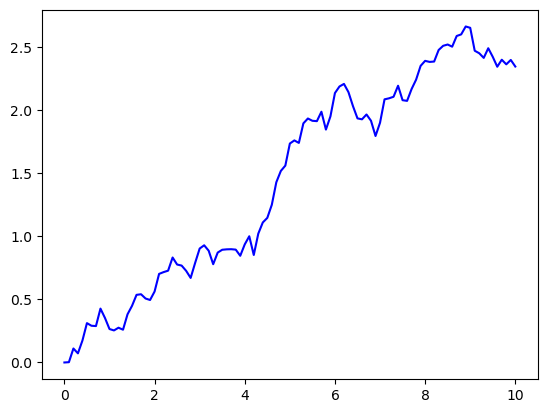

In [6]:
mu = 0.2
sigma = 0.25

dt = 0.1
T = 10
t = np.arange(0, T + dt, dt)
x = np.zeros_like(t)

for k in range(len(t) - 1):
    increment = mu * dt + sigma * np.sqrt(dt) * np.random.randn()
    x[k + 1] = x[k] + increment

plt.plot(t, x, 'b')
plt.show()

### Example: Geometric Brownian Motion

The process $\{X_t\:\vert\: t\in [0, \infty)\}$ is a *Brownian motion* with parameters $\mu$ and $\sigma$ if it is a Markov process and for every $0 \leq t_1 < t_2 < \infty$, the ratio $S_{t_2}/S_{t_1}$ is lognormally distributed.  In particular, this means

$$\ln\left(\frac{S_{t_{2}}}{S_{t_1}}\right) \sim N\left(\left(\mu - \frac{\sigma^2}{2}\right)\Delta t, \sigma^2\Delta t\right)$$

We denote such a process by $X\sim GBM(\mu, \sigma)$.

It is useful to note (and sometimes taken as the definition) that if $X\sim GBM(\mu, \sigma)$, then $\ln(X)\sim BM(\mu - \sigma^2/2, \sigma)$.  Similarly, if $X\sim BM(\mu, \sigma)$, then $\exp(X)\sim GBM(\mu + \sigma^2/2, \sigma)$.

As above, the parameters $\mu$ and $\sigma$ are referred to as the drift and volatility.  Note that the extra $\pm\sigma^2/2$ term is used so that we will have

$$\mathbb{E}\left[X_{t_2} - X_{t_1}\right] = \mu\Delta t$$

It is very common to assume that the value of an asset such as a share of stock is a geometric Brownian motion.